In [68]:
import pandas as pd

# Load data from CSV files
df_properties = pd.read_csv('properties.csv')
df_private_sellers = pd.read_csv('private_seller_properties.csv')

# Combine both datasets into one if needed
df_all_properties = pd.concat([df_properties, df_private_sellers], ignore_index=True)


In [69]:
# Summary statistics
price_stats = df_all_properties['Price'].describe()
print("Summary Statistics of Property Prices:")
print(price_stats)



Summary Statistics of Property Prices:
count                    402
unique                   133
top       Цена при запитване
freq                      18
Name: Price, dtype: object


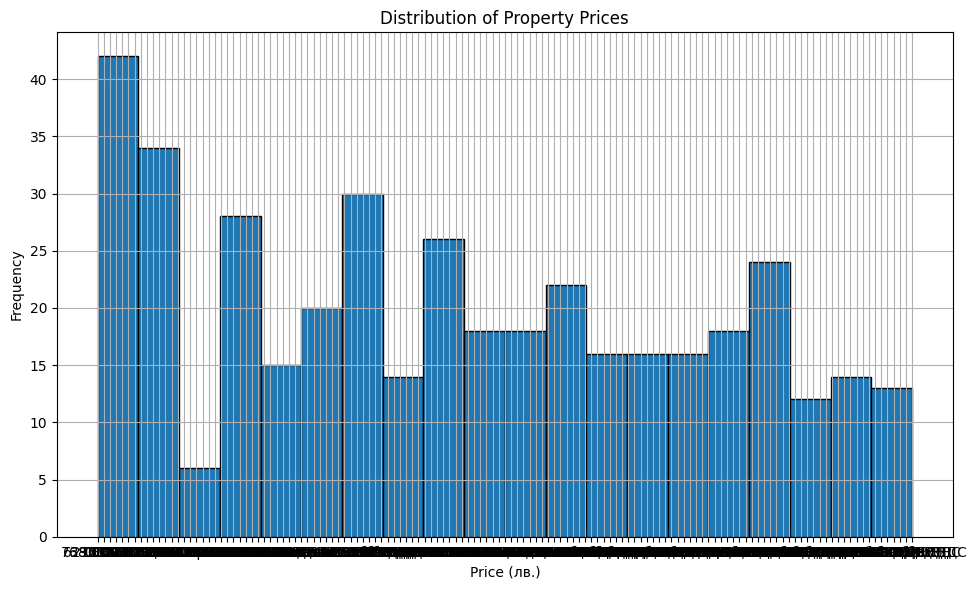

In [70]:
import matplotlib.pyplot as plt

# Distribution of property prices
plt.figure(figsize=(10, 6))
plt.hist(df_all_properties['Price'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Property Prices')
plt.xlabel('Price (лв.)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
# Assuming df_all_properties is your combined DataFrame

# Define criteria for uniqueness (e.g., based on URL)
unique_properties = df_all_properties.drop_duplicates(subset=['URL'])

# Display the number of unique properties
print(f"Number of unique properties: {len(unique_properties)}")


Number of unique properties: 221


In [72]:
# Top properties by size
top_properties_by_size = df_all_properties.sort_values(by='Size', ascending=False).head(10)

# Display top properties by size
print("Top 10 Properties by Size:")
print(top_properties_by_size[['Price', 'Size', 'Location', 'Seller']])


Top 10 Properties by Size:
                          Price             Size              Location  \
201  74 000 EURЦената е без ДДС  Продава 4-СТАЕН  град Габрово, Център   
200                  80 000 EUR  Продава 4-СТАЕН  град Габрово, Център   
388                  65 000 EUR  Продава 4-СТАЕН  град Габрово, Център   
373                 115 000 EUR  Продава 4-СТАЕН  град Габрово, Център   
372                 102 000 EUR  Продава 4-СТАЕН  град Габрово, Център   
371                  95 000 EUR  Продава 4-СТАЕН  град Габрово, Център   
370  75 400 EURЦената е без ДДС  Продава 4-СТАЕН  град Габрово, Център   
369  74 000 EURЦената е без ДДС  Продава 4-СТАЕН  град Габрово, Център   
368                  80 000 EUR  Продава 4-СТАЕН  град Габрово, Център   
205                 115 000 EUR  Продава 4-СТАЕН  град Габрово, Център   

                       Seller  
201        monolit-bg.imot.bg  
200        monolit-bg.imot.bg  
388                       NaN  
373            regent.imot.bg 

In [73]:
# Assuming df_all_properties is your combined DataFrame

# Count number of ads per seller
seller_ads_count = df_all_properties['Seller'].value_counts()

# Display top sellers by number of ads
print("Top Sellers by Number of Ads:")
print(seller_ads_count.head(10))


Top Sellers by Number of Ads:
Seller
regent.imot.bg              150
dikova.imot.bg               94
monolit-bg.imot.bg           38
koevimotiaddress.imot.bg     33
sdelka.imot.bg               26
paragon.imot.bg              14
superimotibg.imot.bg          6
msbuild.imot.bg               4
imotigabrovo.imot.bg          2
accent_vt.imot.bg             2
Name: count, dtype: int64


In [75]:
# Clean 'Price' column: remove non-numeric characters and convert to float
df_all_properties['Price'] = df_all_properties['Price'].str.replace(r'[^\d.]', '', regex=True)

# Convert to float, handling errors='coerce' to handle any remaining non-numeric values
df_all_properties['Price'] = pd.to_numeric(df_all_properties['Price'], errors='coerce')

# Drop rows with NaN values in 'Price' column, if necessary
df_all_properties = df_all_properties.dropna(subset=['Price'])

# Now calculate total property value per seller
seller_total_value = df_all_properties.groupby('Seller')['Price'].sum()

# Display top sellers by total property value
print("\nTop Sellers by Total Property Value:")
print(seller_total_value.sort_values(ascending=False).head(10))



Top Sellers by Total Property Value:
Seller
regent.imot.bg              14905005.0
dikova.imot.bg              11034539.0
monolit-bg.imot.bg           3576800.0
koevimotiaddress.imot.bg     1994795.0
sdelka.imot.bg               1358728.0
paragon.imot.bg              1254380.0
msbuild.imot.bg               554000.0
superimotibg.imot.bg          308000.0
leoimoti.imot.bg              230000.0
address_vt.imot.bg            160000.0
Name: Price, dtype: float64
